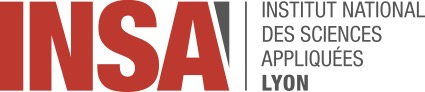
# P2I7: Chapitre 2 méthodes numériques
## Principe d'approximation d'une EDO par un schéma numérique
Camille Carvalho (INSA/ICJ)

In [1]:
#libraries à importer
%matplotlib inline 
from matplotlib import pyplot as plt #librairie d'affichage
import numpy as np #librairie pour le calcul numérique
import sympy as sp #libraire pour la calcul symbolique

Pendant cette séance on considère le problème de Cauchy correspondant au pendule non amorti (linéarisé autour de l'état d'équilibre) :
$$
   \ddot{\theta}(t) = -\frac{g}{\ell}\theta(t), ~~~\mbox{ pour } t \ge 0, \quad \theta(0) = \alpha, ~~ \dot{\theta}(0) = 0,
$$
où $\alpha$ est l'angle initial auquel on lâche le pendule à l'instant initial $t=0$ avec une vitesse nulle.


On souhaite approcher numériquement la solution de ce problème de Cauchy. Pour cela on va se fixer un $\Delta t > 0$ un pas de temps donné, $T > 0$ un temps de simulation avec $T = N\Delta t$, pour $N$ un entier, et on va poser
$$ t_i = i\Delta t ~~~\mbox{ pour } 0 \le i \le N. $$
On teste ici 3 schémas:
- Euler explicite
- Euler implicite
- Verlet

# Section 2.1 Schéma d'Euler explicite
**Question 1.** Remettez le problème de Cauchy ci-dessus sous la forme d'un système d'ordre 1 et écrivez le schéma d'Euler explicite dessus. Déduisez-en la règle qui fait passer de $\theta_i, \dot{\theta}_i$ à $\theta_{i+1}, \dot{\theta}_{i+1}$.

**Solution.** On réécrit le problème comme un système du premier ordre
$$ {Y}' = \begin{bmatrix} y' \\ y'' \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -\frac{g}{l} & 0\end{bmatrix} Y = FY, \quad {Y}(0) = \begin{bmatrix} \alpha \\ 0 \end{bmatrix}
$$
et l'on programme alors 
$$ Y_{i+1} = Y_{i} + {\Delta t}F(t_{i}, Y_{i}) , \quad i  = 1, \dots, N-1, \quad \Delta t = \frac{T}{N}, \quad Y_0 = Y(0)$$

**Question 2.** Programmer les itérations de ce schéma en Python et visualiser les solutions pour $\ell = 1$, $g = 10$, $\alpha=1$ et $T=10$.

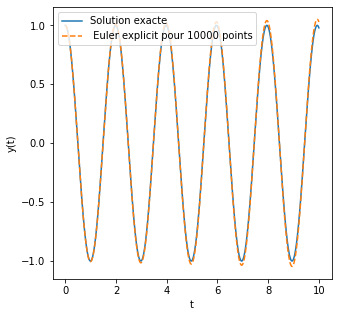

In [2]:
# SOLUTION: l'option proposée répond aux questions 2 et 3.
α = 1
g = 10
l = 1
f1 = lambda t, y, yp: yp
f2 = lambda t, y, yp: -g/l*y
y0 = [α, 0]
a = 0
b = 10
N = 10000

# Fonction calculant la solution discrète et l'énergie discrète
def euler_explicit_2D(f1, f2, a, b, α0, N):
    '''
    function that approximate the initial value problem (IVP) y'(t) = f(t,y(t))
    a < t < b, y(a) = α, using explicit Euler method, when y is a 2D vector
    
    Parameters
    ==========
    f1: first component function in IVP
    f2: second component function in IVP
    a: float number, lower bound time interval
    b: float number, upper bound time interval
    α0: float number, initial condition of the IVP at t = a
    N: integer, number of subintervals
    
    Returns
    =======
    The sampled time t, as an array of values
    The solution y, as an array of values
    The derivative solution yp, as an array of values
    The energy E, as an array of values
    '''
    
    Δt = (b-a)/ N
    t = [a + i * Δt for i in range(N+1)] #careful in range, the endpoint is excluded
    y = [α0[0]]
    yp = [α0[1]]
    E = [0.5*(g/l)* α0[0]**2]    
    for i in range(1, N+1):
        y.append( y[i-1] + Δt * f1(t[i-1], y[i-1], yp[i-1]) )
        yp.append( yp[i-1] + Δt * f2(t[i-1], y[i-1], yp[i-1]) )
        E.append( 1/2* (yp[i]**2 + (g/l)* y[i]**2) )
    return t, y, yp, E

# comparison approximation and exact solution
t, y, yp, E = euler_explicit_2D(f1, f2, a, b, y0, N)
exact = lambda x: α* np.cos(np.sqrt(g/l)*x)
energy_exact = 0.5*(g/l)* α**2 

fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
ax1.plot(t, exact(np.array(t)), label = 'Solution exacte')
ax1.plot(t, y, '--', label = f' Euler explicit pour {N} points')
ax1.legend(loc = 'upper left')
ax1.set_xlabel('t')
ax1.set_ylabel('y(t)')
error_y = np.abs(y - exact(np.array(t)) )

**Question 3.** L'énergie totale du système au pas de temps $i$ s'écrit
    $$ \frac{1}{2}  (\dot{\theta}_i)^2 + \frac{g}{2\ell}\theta_i^2. $$
    Le pendule étant non-amorti, cette énergie doit se conserver au cours
    du temps. Dessinez l'évolution de l'énergie totale au cours du temps.
    Que remarquez-vous ?

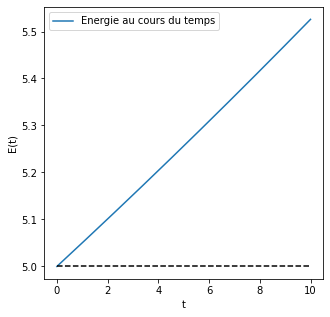

In [3]:
fig, ax2 = plt.subplots(1, 1, figsize=(5, 5))
ax2.plot(t, E, label = 'Energie au cours du temps')
ax2.hlines(energy_exact, t[0], t[-1], colors='k', linestyles='--') 
ax2.set_xlabel('t')
ax2.set_ylabel('E(t)')
ax2.legend(loc = 'upper left')

**Observations.** L'énergie ne reste pas constante (ceci est aussi très dépendant du nombre de points de discrétisation). L'erreur s'accumule et surestime la solution (donc l'énergie) à chaque pas de temps. 

Remarquez que l'on peut éliminer la vitesse $\dot{\theta}_i$ (en soustrayant à la première ligne du schéma la m\^eme première ligne écrite au pas $i-1$). On obtient alors
$$ \theta_{i+1} - 2\theta_i + \theta_{i-1} = -({\Delta t})^2 \frac{g}{\ell}\theta_{i-1}. $$
Cela peut être intéressant, mais il s'agit d'un schéma à **deux pas** ($\theta_{i+1}$ est donné en fonction de $\theta_i$ et $\theta_{i-1}$). En pratique, il faudra d'abord calculer $\theta_1$ avec le schéma à un pas avant de pouvoir l'utiliser.

# Section 2.2 Schéma d'Euler implicite 
On considère maintenant le schéma
$$ Y_{i+1} = Y_{i} + {\Delta t}F(t_{i+1}, Y_{i+1}). $$

**Question 1.** En réutilisant le problème ci-dessus sous la forme d'un système d'ordre 1, écrivez le schéma d'Euler implicite associé. Déterminer ce qui est à résoudre à chaque pas de temps.

**Solution.** On réécrit le problème comme un système du premier ordre
$$ {Y}' = \begin{bmatrix} y' \\ y'' \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -\frac{g}{l} & 0\end{bmatrix} Y = FY, \quad {Y}(0) = \begin{bmatrix} \alpha \\ 0 \end{bmatrix}
$$
et l'on programme alors 
$$ Y_{i+1} = Y_{i} + {\Delta t}F(t_{i+1}, Y_{i+1}) , \quad i  = 1, \dots, N-1, \quad \Delta t = \frac{T}{N}, \quad Y_0 = Y(0)$$
On peut dans ce cas écrire explicitement la solution:
$$ y(t_i) = (y(t_{i-1})+ \Delta t y'(t_{i-1})) \frac{l}{l+ gΔt^2}$$
$$ y'(t_i) = y'(t_{i-1})-\frac{g}{l}\Delta t y(t_i)$$

**Question 2.** Adaptez votre programme Python au schéma d'Euler implicite. Pour cela, trouvez l'équation que doit résoudre $\theta_{i+1}$. Pour notre problème, cette équation est linéaire et peut donc être résolue à la main. Ce ne sera pas le cas avec des problèmes non-linéaires. Visualisez la solution.

Erreur implicit =  0.04847951375328108


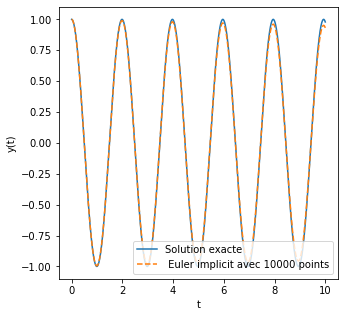

In [4]:
# SOLUTION: l'option proposée répond aux questions 2 et 3.
α = 1
g = 10
l = 1
f1 = lambda t, y, yp: yp
f2 = lambda t, y, yp: -g/l*y
y0 = [α, 0]
a = 0
b = 10
N = 10000

# Fonction calculant la solution discrète et l'énergie discrète

def euler_implicit_pendulum(g, l, a, b, α0, N):
    '''
    function that approximate the initial value problem (IVP) y"(t)= -g/l*y(t) (not the general IVP)
    a < t < b, y(a) = α, using implicit Euler method.
    
    Parameters
    ==========
    g: float number, parameter of the IVP function
    l: float number, parameter of the IVP function
    a: float number, lower bound time interval
    b: float number, upper bound time interval
    α: float number, initial condition of the IVP at t = a
    N: integer, number of subintervals
    
    Returns
    =======
    The sampled time t, as an array of values
    The solution y, as an array of values
    The derivative solution yp, as an array of values
    The energy E, as an array of values
    '''
    
    Δt = (b-a)/ N
    t = [a + i * Δt for i in range(N+1)] 

    y = [α0[0]] 
    yp = [α0[1]]
    E = [0.5*(g/l)* α0[0]**2]
    for i in range(1, N+1):
        sol = (y[i-1]+ Δt * yp[i-1])*l/(l+ g*Δt**2)
        y.append( sol )
        yp.append( yp[i-1] -(g/l)*Δt*sol)
        E.append( 1/2* (yp[i]**2 + (g/l)* y[i]**2) )
    return t, y, yp, E

# comparison approximation and exact solution
tI, yI, ypI, Ei = euler_implicit_pendulum(g, l, a, b, y0, N)
exact = lambda x: α* np.cos(np.sqrt(g/l) *x)
energy_exact = 0.5*(g/l)* α**2 

fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
ax1.plot(tI, exact(np.array(tI)), label = 'Solution exacte')
ax1.plot(tI, yI, '--', label = f' Euler implicit avec {N} points')
ax1.legend(loc = 'lower right')
ax1.set_xlabel('t')
ax1.set_ylabel('y(t)')
error_yI = np.max(np.abs(yI - exact(np.array(tI)) ) )
print('Erreur implicit = ', error_yI)

**Question 3.** Dessinez également l'évolution de l'énergie totale au cours du temps.
  Que remarquez-vous comme différence avec le schéma d'Euler explicite ?

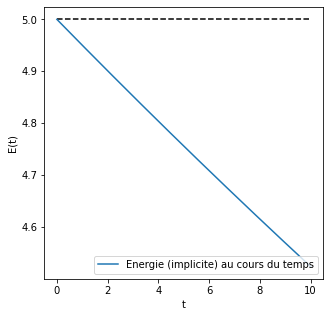

In [5]:
fig, ax2 = plt.subplots(1, 1, figsize=(5, 5))
ax2.hlines(energy_exact, tI[0], tI[-1], colors='k', linestyles='--') 
ax2.plot(tI, Ei, label = 'Energie (implicite) au cours du temps')
ax2.set_xlabel('t')
ax2.set_ylabel('E(t)')
ax2.legend(loc = 'lower right')

**Observations.** L'énergie ne reste pas constante (ceci est aussi très dépendant du nombre de points de discrétisation). L'erreur décroit cette fois et sousestime la solution (donc l'énergie) à chaque pas de temps. 

  
Vous pourrez remarquer que l'on peut toujours éliminer la vitesse $\dot{\theta}_i$ et que l'on arrive au schéma à **deux pas**
  $$ \theta_{i+1} - 2\theta_i + \theta_{i-1} = -({\Delta t})^2 \frac{g}{\ell}\theta_{i+1}. $$

# Section 2.3 Schéma de Verlet
**Question 1.** Adaptez votre programme Python au schéma de Verlet et visualiser la solutions ainsi que l'évolution de l'énergie totale. Que remarquez-vous ?

Error explicit =  0.10452062114623883 Error implicit =  0.09460101687327238 Error Verlet =  4.976991312959089e-05


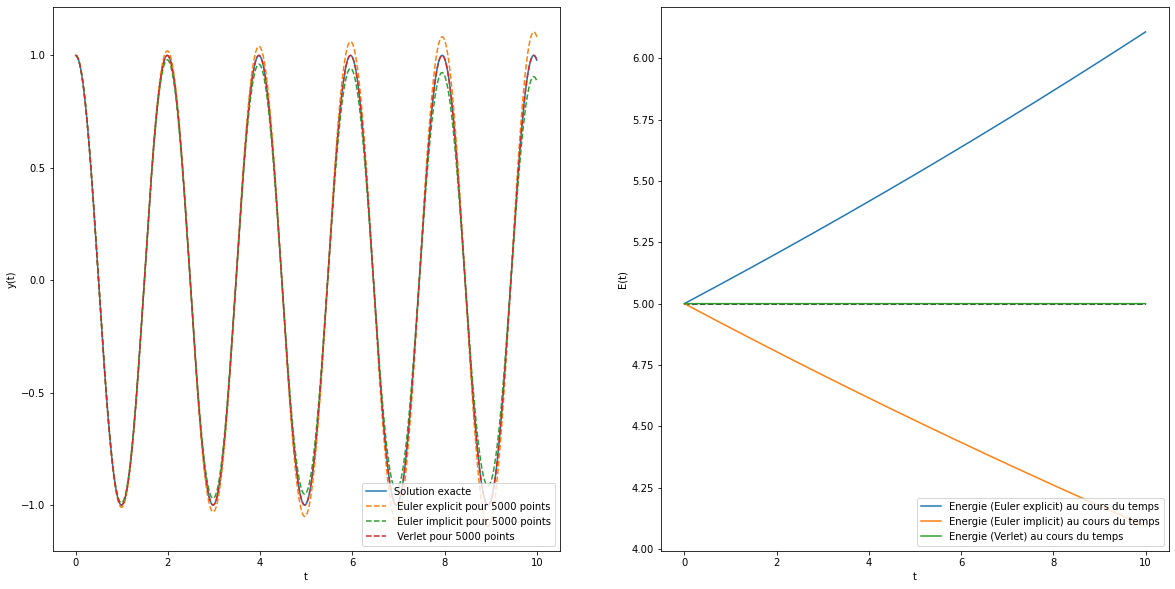

In [11]:
# SOLUTION
def verlet_pendulum(g, l, a, b, α0, N):
    '''
    function that approximate the initial value problem (IVP) y"(t)= -g/l*y(t) (not the general IVP)
    a < t < b, y(a) = α, using Verlet method.
    
    Parameters
    ==========
    g: float number, parameter of the IVP function
    l: float number, parameter of the IVP function
    a: float number, lower bound time interval
    b: float number, upper bound time interval
    α: float number, initial condition of the IVP at t = a
    N: integer, number of subintervals
    
    Returns
    =======
    The sampled time t, as an array of values
    The solution y, as an array of values
    The derivative solution yp, as an array of values
    The energy E, as an array of values
    '''
    
    Δt = (b-a)/ N
    t = [a + i * Δt for i in range(N+1)] 

    y = [α0[0]]
    yp = [α0[1]]
    E = [0.5*(g/l)* α0[0]**2]
    for i in range(1, N+1):
        y.append( y[i-1]+ Δt * yp[i-1] - (g/l)*Δt**2 * y[i-1]/2 )
        yp.append( yp[i-1] -(g/l)*(Δt/2)*(y[i-1]+ y[i]) )
        E.append( 1/2* (yp[i]**2 + (g/l)* y[i]**2) )
    return t, y, yp, E

# Application to the Cauchy problem (2.1)
α = 1
g = 10
l = 1
f1 = lambda t, y, yp: yp
f2 = lambda t, y, yp: -g/l*y
y0 = [α, 0]
a = 0
b = 10
N = 5000

# comparison approximation and exact solution
tE, yE, ypE, Ee = euler_explicit_2D(f1, f2, a, b, y0, N)
tI, yI, ypI, Ei = euler_implicit_pendulum(g, l, a, b, y0, N)
tV, yV, ypV, Ev = verlet_pendulum(g, l, a, b, y0, N)
exact = lambda x: α* np.cos(np.sqrt(g/l) *x)
energy_exact = 0.5*(g/l)* α**2 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.plot(tI, exact(np.array(tI)), label = 'Solution exacte')
ax1.plot(tE, yE, '--', label = f' Euler explicit pour {N} points')
ax1.plot(tI, yI, '--', label = f' Euler implicit pour {N} points')
ax1.plot(tV, yV, '--', label = f' Verlet pour {N} points')
ax1.legend(loc = 'lower right')
ax1.set_xlabel('t')
ax1.set_ylabel('y(t)')
ax2.hlines(energy_exact, tE[0], tE[-1], colors='k', linestyles='--') 
ax2.plot(tE, Ee, label = 'Energie (Euler explicit) au cours du temps')
ax2.plot(tI, Ei, label = 'Energie (Euler implicit) au cours du temps')
ax2.plot(tV, Ev, label = 'Energie (Verlet) au cours du temps')
ax2.set_xlabel('t')
ax2.set_ylabel('E(t)')
ax2.legend(loc = 'lower right')
error_yE = np.max(np.abs(yE - exact(np.array(tE)) ) )
error_yI = np.max(np.abs(yI - exact(np.array(tI)) ) )
error_yV = np.max(np.abs(yV - exact(np.array(tV)) ) )
print('Error explicit = ', error_yE, 'Error implicit = ', error_yI, 'Error Verlet = ', error_yV)

**Observations.** L'énergie se conserve cette fois avec le schéma de Verlet. On observe en fait même des oscillations autour de la valeur exacte.

Vous pourrez remarquer que l'on peut toujours éliminer la vitesse $\dot{\theta}_i$ et que l'on arrive au schéma à **deux pas**
$$ \theta_{i+1} - 2\theta_i + \theta_{i-1} = -({\Delta t})^2 \frac{g}{\ell}\theta_{i}. $$
  Il s'agit donc d'un schéma explicite qui est en un certain sens intermédiaire entre le schéma d'Euler explicite de celui d'Euler implicite.